In [1]:
# Supervised learning using a feedforward network

In [59]:
# Get and preprocess the data according to our requirement
import pandas as pd
data = pd.read_csv('pow_consump.csv')
print('\n #Features = '+str(data.shape[1]))
print('\n #Samples = '+str(data.shape[0]))
data.head()


 #Features = 9

 #Samples = 52416


,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [60]:
# For simplicity we would be using only two features for this regression task.
data = pd.read_csv('pow_consump.csv', usecols = ['Temperature', 'Zone 1 Power Consumption'])
print('\n #Features = '+str(data.shape[1]))
print('\n #Samples = '+str(data.shape[0]))
data.head()


 #Features = 2

 #Samples = 52416


,Temperature,Zone 1 Power Consumption
0,6.559,34055.69620
1,6.414,29814.68354
2,6.313,29128.10127
3,6.121,28228.86076
4,5.921,27335.69620


In [190]:
# So now, 'Temperature' is our input feature and 'Zone 1 power consumption' is our target label.
# Following is the code for the training network.
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
from torch.nn.functional import normalize

# define pytorch dataset and dataloader class 
class CustomDataset(Dataset):
    
    def __init__(self):
        # data loading
        dat = data.to_numpy(dtype= np.float32)
        self.x= torch.from_numpy(dat[:,[0]])
        self.x = torch.nn.functional.normalize(self.x, p=2.0, dim = 0)
        self.y = torch.from_numpy(dat[:,[1]])
        #self.y = torch.nn.functional.normalize(self.y, p=2.0, dim = 0)
        self.num_samples = dat.shape[0]

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.num_samples

dats = CustomDataset()
dataloader = DataLoader(dataset = dats, batch_size=100, shuffle=True)


In [191]:
import torch.nn as nn
input_size = dats.x.shape[1]
output_size = dats.y.shape[1]

# define network architecture
class myModel(nn.Module):
    def __init__(self,input_dim, output_dim, hidden_size=32):
        super(myModel, self).__init__()
        #define network layers
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size, output_size)
      
    def forward(self,x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        
        return out
    
model = myModel(input_size, output_size)
print(model)

myModel(
  (fc1): Linear(in_features=1, out_features=32, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=32, out_features=1, bias=True)
)


In [192]:
#define loss function, optimizer and hyperparameters
loss = nn.MSELoss()
learning_rate = 0.01
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  
num_epochs = 10
total_step = len(dataloader)
llist = []
print(num_epochs)

10


In [193]:
# Run training loop
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(dataloader):
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        # Forward pass
        y_pred = model(inputs)
        l = loss(y_pred, labels)
        
        # Backward pass and optimize
        l.backward()
        optimizer.step()
        optimizer.zero_grad()
              
        llist.append(l)
        if (i+1) % 500 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, total_step, l.item()))


Epoch [1/10], Step [500/525], Loss: 44216428.0000
Epoch [2/10], Step [500/525], Loss: 47526580.0000
Epoch [3/10], Step [500/525], Loss: 40517216.0000
Epoch [4/10], Step [500/525], Loss: 54344884.0000
Epoch [5/10], Step [500/525], Loss: 54423444.0000
Epoch [6/10], Step [500/525], Loss: 50164080.0000
Epoch [7/10], Step [500/525], Loss: 47353780.0000
Epoch [8/10], Step [500/525], Loss: 53227320.0000
Epoch [9/10], Step [500/525], Loss: 47974340.0000
Epoch [10/10], Step [500/525], Loss: 51862156.0000


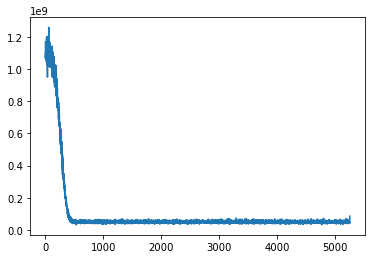

In [194]:
cal = np.arange(len(llist))
import matplotlib.pyplot as plt
plt.plot(cal, llist)